In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

   Dim     N   Vol    Vol_th   Err_rel
0    3   100  4.32  4.188790  0.031324
1    3   200  4.32  4.188790  0.031324
2    3   400  4.02  4.188790  0.040296
3    3   800  4.34  4.188790  0.036099
4    3  1600  4.20  4.188790  0.002676
5    6   100  5.12  5.167713  0.009233
6    6   200  3.84  5.167713  0.256925
7    6   400  3.20  5.167713  0.380771
8    6   800  5.12  5.167713  0.009233
9    6  1600  4.84  5.167713  0.063415


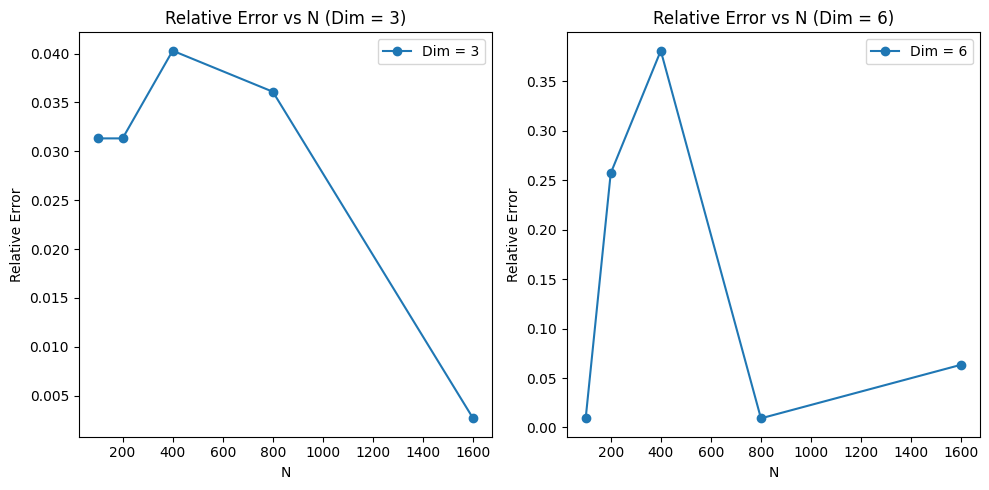

In [80]:
R = 1

def evaluateVolume(Dim, N, Ness=100):
# Fonction qui prend la moyenne de Ness essai de calcul du volume 
# d'une sphère en Dim dimensions avec N points
    V_sphere = np.zeros(Ness)
    for i in range(Ness):
        N_int =0
        N_tot = 0
        V_tot=(2*R)**Dim
        for n in range(N):    
            random_list = [random.uniform(0, R) for _ in range(Dim)]
            if sum(x**2 for x in random_list) <= R**2:
                N_int+=1
            N_tot+=1

        V_sphere[i] = N_int/N_tot*V_tot
    return np.mean(V_sphere)

results=[]
for dim in [3, 6]:
    for n in [1, 2, 4, 8, 16]:
        volume = evaluateVolume(dim, n)
        volume_th = np.pi**((dim/2))/math.gamma(dim/2 + 1)
        error = np.abs((volume - volume_th)/volume_th)
        results.append({'Dim': dim, 'N': n*100, 'Vol': volume,'Vol_th' : volume_th, 'Err_rel' : error})
        
df = pd.DataFrame(results)
print(df)


In [ ]:
# Separate DataFrames for each dimension
df_dim3 = df[df['Dim'] == 3]
df_dim6 = df[df['Dim'] == 6]

# Plotting
plt.figure(figsize=(10, 5))

# Plot for Dim = 3
plt.subplot(1, 2, 1)
plt.plot(df_dim3['N'], df_dim3['Err_rel'], marker='o', label='Dim = 3')
plt.title('Relative Error vs N (Dim = 3)')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend()

# Plot for Dim = 6
plt.subplot(1, 2, 2)
plt.plot(df_dim6['N'], df_dim6['Err_rel'], marker='o', label='Dim = 6')
plt.title('Relative Error vs N (Dim = 6)')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend()

plt.tight_layout()
plt.show()